# Machine Learning Model for the InsuranceCharges Data

Let's create a Regression Machine Learning Model to predict the costs incured by a new customer with attributes (age, sex, bmi, children, smoker, region)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('clean_insurance.csv')

In [3]:
df

,age,sex,bmi,children,region,charges,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,1
1,18,male,33.770,1,southeast,1725.55230,0
2,28,male,33.000,3,southeast,4449.46200,0
3,33,male,22.705,0,northwest,21984.47061,0
4,32,male,28.880,0,northwest,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0
1334,18,female,31.920,0,northeast,2205.98080,0
1335,18,female,36.850,0,southeast,1629.83350,0
1336,21,female,25.800,0,southwest,2007.94500,0


Make dummy variables for region and sex

In [4]:
df_dummies = pd.get_dummies(df, columns = ['sex', 'region'], drop_first = True)

In [5]:
X = df_dummies.drop(columns = 'charges').copy()
y = df_dummies[['charges']].copy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 9)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Let's assess how our model is doing compared to the test set

In [8]:
charge_predictions = model.predict(X_test)

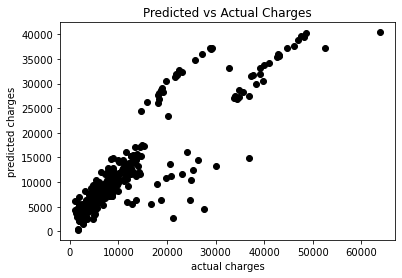

In [9]:
# Plot outputs
plt.scatter(y_test, charge_predictions, color="black")

#plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xlabel('actual charges')
plt.ylabel('predicted charges')
plt.title('Predicted vs Actual Charges')

plt.show()

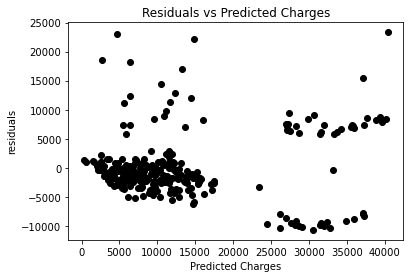

In [10]:
# Plot residuals
residuals = y_test - charge_predictions
plt.scatter(charge_predictions, residuals, color="black")
plt.xlabel('Predicted Charges')
plt.ylabel('residuals')
plt.title('Residuals vs Predicted Charges')

plt.show()

In [11]:
model.score(X_test, y_test)

0.7775428684674435

Let's check how our model does when we eliminate the `Sex` column

In [12]:
df_dummies

,age,bmi,children,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [13]:
no_sex_df = df_dummies.copy()

In [14]:
no_sex_df = no_sex_df.drop(columns = 'sex_male')

In [15]:
no_sex_df

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,0,1,0
2,28,33.000,3,4449.46200,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,0
4,32,28.880,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,1


In [16]:
no_sex_X = no_sex_df.drop(columns = 'charges').copy()
no_sex_y = no_sex_df['charges'].copy()

In [17]:
no_sex_X_train, no_sex_X_test, no_sex_y_train, no_sex_y_test = train_test_split(no_sex_X, no_sex_y, test_size=0.20, random_state = 9)

In [18]:
no_sex_model = LinearRegression()
no_sex_model.fit(no_sex_X_train, no_sex_y_train)

LinearRegression()

Let's see how this model performs compared to the other

In [19]:
no_sex_charge_predictions = no_sex_model.predict(no_sex_X_test)

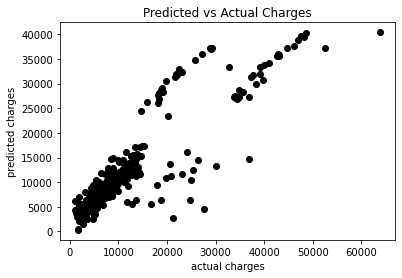

In [20]:
# Plot outputs
plt.scatter(no_sex_y_test, no_sex_charge_predictions, color="black")

#plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xlabel('actual charges')
plt.ylabel('predicted charges')
plt.title('Predicted vs Actual Charges')

plt.show()

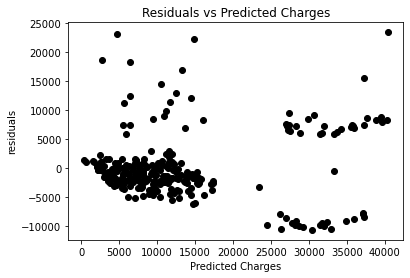

In [21]:
# Plot residuals
no_sex_residuals = no_sex_y_test - no_sex_charge_predictions
plt.scatter(no_sex_charge_predictions, no_sex_residuals, color="black")
plt.xlabel('Predicted Charges')
plt.ylabel('residuals')
plt.title('Residuals vs Predicted Charges')

plt.show()

In [22]:
no_sex_model.score(no_sex_X_test, no_sex_y_test)

0.7774597625117812

Seeing how the model performs the same with and without sex, we will use the data without the sex column

Let's try to optimize the model

In [23]:
clf = Lasso(alpha=0.1)

In [24]:
clf.fit(no_sex_X_train, no_sex_y_train)

Lasso(alpha=0.1)

In [25]:
print(clf.coef_)

[ 2.56393545e+02  3.16758255e+02  4.41578787e+02  2.36517959e+04
  1.03541038e+01 -6.46010176e+02 -7.84949079e+02]


In [26]:
clf.score(no_sex_X_test, no_sex_y_test)

0.7774567527708284

In [27]:
reg = LassoCV(cv=5, random_state=9).fit(no_sex_X_train, no_sex_y_train)

In [28]:
reg.score(no_sex_X_test, no_sex_y_test)

0.7737471874319886

In [29]:
lasso = Lasso(random_state=9)
alphas = np.logspace(-3, 3, 800)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(no_sex_X_train, no_sex_y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

(0.001, 1000.0)

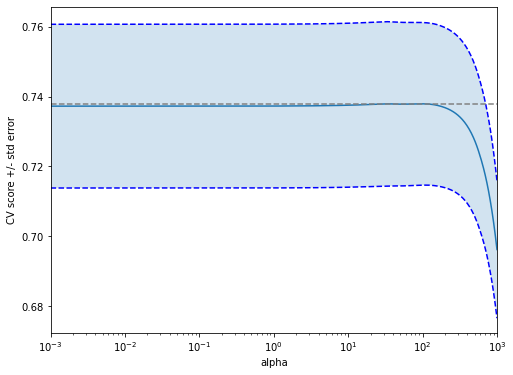

In [30]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

We can see from the plot above that the score is relatively flat and starts to decrease at $\alpha$ ~ 100.
An $\alpha$ = 0 is simply a LinearRegression. Let's see how else we can improve the accuracy of the model in the next notebook `ML-model2.ipynb`